**Importing Dataset** 


In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

**Preprocessing Data**

In [4]:
train_datagen = ImageDataGenerator(zoom_range= 0.5, shear_range= 0.3, horizontal_flip= True, preprocessing_function = preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [5]:
train = train_datagen.flow_from_directory(directory= "/content/drive/MyDrive/Dataset/grape/train", target_size=(256,256), batch_size=32 )

val = val_datagen.flow_from_directory(directory= "/content/drive/MyDrive/Dataset/grape/valid", target_size=(256,256), batch_size=32 )

Found 7222 images belonging to 4 classes.
Found 1805 images belonging to 4 classes.


**Visualising Data**

In [6]:
t_img , label = train.next()

In [7]:
def plotImage(img_arr, label):

  for im , l in zip(img_arr , label):
    plt.figure(figsize=(5,5)) 
    plt.imshow(im)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


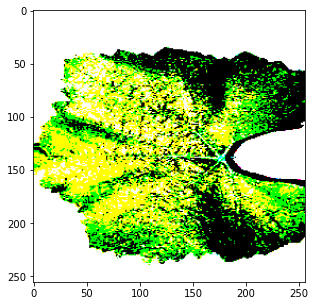

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


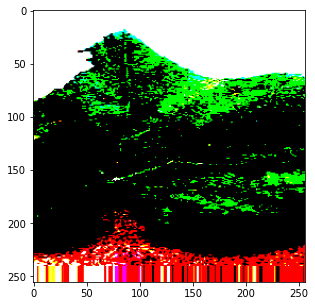

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


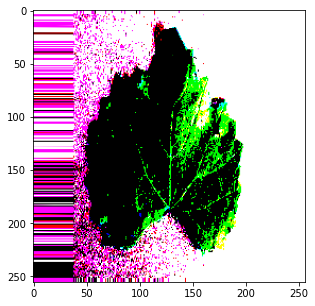

In [8]:
plotImage(t_img[:3],label[:3])

**Model**

In [9]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [10]:
base_model = VGG19(input_shape=(256, 256,3), include_top= False)

80150528/80134624 [==============================] - 1s 0us/step


In [11]:
for layer in base_model.layers:
  layer.trainable = False

In [12]:
X = Flatten() (base_model.output)
X = Dense (units= 4, activation='softmax')(X)

model = Model(base_model.input, X)

In [13]:
model.compile(optimizer= 'adam' , loss= keras.losses.categorical_crossentropy, metrics= ['accuracy'])

**Early Stopping and Model Checkpoints**

In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor= 'val_accuracy', min_delta= 0.01, patience= 3, verbose=1)

mc = ModelCheckpoint(filepath="best_model.h5",
                    monitor= 'val_accuracy',
                    min_delta= 0.01,
                    patience= 3,
                    verbose=1 ,
                    save_best_only= True)

cb = [es,mc]

In [15]:
his = model.fit(train ,
                steps_per_epoch= 16,
                epochs= 50,
                verbose= 1,
                callbacks= cb ,
                validation_data= val ,
                validation_steps= 16)

Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 6.7939 - accuracy: 0.6738
Epoch 00001: val_accuracy improved from -inf to 0.96289, saving model to best_model.h5
16/16 [==============================] - 263s 14s/step - loss: 6.7939 - accuracy: 0.6738 - val_loss: 0.5051 - val_accuracy: 0.9629
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 1.5374 - accuracy: 0.9124
Epoch 00002: val_accuracy did not improve from 0.96289
16/16 [==============================] - 187s 12s/step - loss: 1.5374 - accuracy: 0.9124 - val_loss: 1.0210 - val_accuracy: 0.9434
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 0.5158 - accuracy: 0.9531
Epoch 00003: val_accuracy improved from 0.96289 to 0.97266, saving model to best_model.h5
16/16 [==============================] - 154s 10s/step - loss: 0.5158 - accuracy: 0.9531 - val_loss: 0.5477 - val_accuracy: 0.9727
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 0.7599 - accuracy: 0.9531

**Graphs**

In [16]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

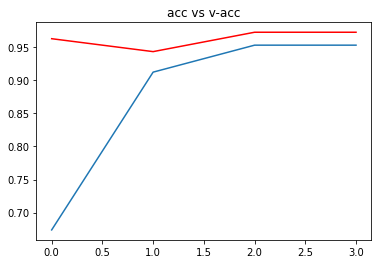

In [17]:
plt.plot (h['accuracy'])
plt.plot (h['val_accuracy'], c = "red")
plt.title("acc vs v-acc")
plt.show()

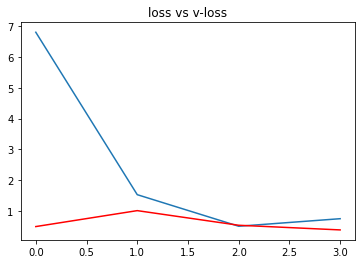

In [18]:
plt.plot(h['loss'])
plt.plot (h['val_loss'], c = "red")
plt.title("loss vs v-loss")
plt.show()

**Importing Model and Prediction**

In [19]:
from keras.models import load_model

model = load_model("/content/best_model.h5")

In [20]:
print(dict(zip( list(train.class_indices.values()) , list(train.class_indices.keys()) ) ))
ref = dict(zip( list(train.class_indices.values()) , list(train.class_indices.keys()) ) )

{0: 'Grape___Black_rot', 1: 'Grape___Esca_(Black_Measles)', 2: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 3: 'Grape___healthy'}


In [21]:
def prediction(path):
  img = load_img(path, target_size = (256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im , axis= 0)
  pred = np.argmax(model.predict(img))
  print(f" the image belongs to { ref[pred] } ")
  #print(model.predict(img))

In [22]:
path = "/content/test/bacterial_spot.JPG"

prediction(path)

FileNotFoundError: ignored